### Dataset Preprocessing

In [14]:
import os
import pandas as pd
from tqdm import tqdm

MODE = "intermediate" # multiple, intermediate, full
DIR = "../topolearn/processed_data"

if MODE == "intermediate":
    # Load data from intermediate results
    folder_path = f'{DIR}/intermediate'
    dataframes = []

    for filename in tqdm(os.listdir(folder_path)):
        if filename.endswith('.csv'):
            df = pd.read_csv(os.path.join(folder_path, filename))
            df["split"] = filename.split("_")[-1].split(".")[0]
            dataframes.append(df)
    df = pd.concat(dataframes, ignore_index=True)
    df.to_csv(f"{DIR}/merged.csv")
elif MODE == "multiple":
    # Load multiple final results files
    dfs = []
    for fn in [f"{DIR}/comparison_1.csv", f"{DIR}/comparison_2.csv"]:
        dfs.append(pd.read_csv(fn))
    df = pd.concat(dfs, axis=0)
    pass
elif MODE == "full":
    # Load a single results file
    filename=f"{DIR}/comparison.csv"
    df = pd.read_csv(filename)

df = df[~df.duplicated()].reset_index(drop=True)
print(df.shape)
df.head()

100%|██████████| 5305/5305 [00:40<00:00, 130.63it/s]


(21216, 152)


,Unnamed: 0,representation,model,dataset,samples,qed,mw,distance_metric,param_grid,dimensionality,best_cv_score,best_params,MAE_2023,RMSE_2023,MAPE_2023,R2_2023,MAE_2024,RMSE_2024,MAPE_2024,R2_2024,MAE_2025,RMSE_2025,MAPE_2025,R2_2025,MAE_2026,RMSE_2026,MAPE_2026,R2_2026,dgms,b_0,b_1,b_0_norm,b_1_norm,ph_entr_0,ph_entr_1,lifetimes_min_0,norm_lifetimes_min_0,lifetimes_max_0,norm_lifetimes_max_0,lifetimes_mean_0,norm_lifetimes_mean_0,lifetimes_var_0,norm_lifetimes_var_0,lifetimes_sum_0,norm_lifetimes_sum_0,midlifes_min_0,norm_midlifes_min_0,midlifes_max_0,norm_midlifes_max_0,midlifes_mean_0,norm_midlifes_mean_0,midlifes_var_0,norm_midlifes_var_0,midlifes_sum_0,norm_midlifes_sum_0,lifetimes_min_1,norm_lifetimes_min_1,lifetimes_max_1,norm_lifetimes_max_1,lifetimes_mean_1,norm_lifetimes_mean_1,lifetimes_var_1,norm_lifetimes_var_1,lifetimes_sum_1,norm_lifetimes_sum_1,midlifes_min_1,norm_midlifes_min_1,midlifes_max_1,norm_midlifes_max_1,midlifes_mean_1,norm_midlifes_mean_1,midlifes_var_1,norm_midlifes_var_1,midlifes_sum_1,norm_midlifes_sum_1,ph_dim_0,ph_dim_logspace0,ph_dim_logedges0,ph_dim_1,ph_dim_logspace1,ph_dim_logedges1,dgms_train,b_0_train,b_1_train,b_0_norm_train,b_1_norm_train,ph_entr_0_train,ph_entr_1_train,lifetimes_min_0_train,norm_lifetimes_min_0_train,lifetimes_max_0_train,norm_lifetimes_max_0_train,lifetimes_mean_0_train,norm_lifetimes_mean_0_train,lifetimes_var_0_train,norm_lifetimes_var_0_train,lifetimes_sum_0_train,norm_lifetimes_sum_0_train,midlifes_min_0_train,norm_midlifes_min_0_train,midlifes_max_0_train,norm_midlifes_max_0_train,midlifes_mean_0_train,norm_midlifes_mean_0_train,midlifes_var_0_train,norm_midlifes_var_0_train,midlifes_sum_0_train,norm_midlifes_sum_0_train,lifetimes_min_1_train,norm_lifetimes_min_1_train,lifetimes_max_1_train,norm_lifetimes_max_1_train,lifetimes_mean_1_train,norm_lifetimes_mean_1_train,lifetimes_var_1_train,norm_lifetimes_var_1_train,lifetimes_sum_1_train,norm_lifetimes_sum_1_train,midlifes_min_1_train,norm_midlifes_min_1_train,midlifes_max_1_train,norm_midlifes_max_1_train,midlifes_mean_1_train,norm_midlifes_mean_1_train,midlifes_var_1_train,norm_midlifes_var_1_train,midlifes_sum_1_train,norm_midlifes_sum_1_train,ph_dim_0_train,ph_dim_logspace0_train,ph_dim_logedges0_train,ph_dim_1_train,ph_dim_logspace1_train,ph_dim_logedges1_train,sample_size,sample_dim,pca_dim,twonn_dim,rogi,rogi_xd,rmodi,sari,sample_size_train,sample_dim_train,pca_dim_train,twonn_dim_train,rogi_train,rogi_xd_train,rmodi_train,sari_train,n_fits,split
0,0,ChemBERTa,MLPRegressor,ADRA1A,500,2.231048,420.355558,jaccard,"{'hidden_layer_sizes': [(100,), (300,), (50, 5...",385,-1.872836,"{'activation': 'relu', 'batch_size': 32, 'earl...",2.642796,3.170265,6.054418,-0.025954,2.600283,3.159210,5.529330,-0.018811,2.589900,3.126363,5.303836,0.002264,2.698278,3.246579,5.738079,-0.075942,"[[[0.0, 0.002597402548417449]], []]",1,0,0.002,0.000,0.000000,NaN,2.597403e-03,1.000000e+00,0.002597,1.000000,0.002597,1.000000,0.000000,0.000000e+00,0.002597,1.0,1.298701e-03,1.000000e+00,0.001299,1.000000,0.001299,1.000000,0.000000,0.000000e+00,0.001299,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[2.0, 2.1760912590556813, 2.3010299956639813, ...","[-2.585460737698983, -inf, -inf, -inf, -2.5854...",NaN,"[2.0, 2.1760912590556813, 2.3010299956639813, ...","[-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf]","[[], []]",0,0,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[2.0, 2.1760912590556813, 2.3010299956639813, ...","[-inf, -inf, -inf, -inf, -inf, -inf]",NaN,"[2.0, 2.1760912590556813, 2.3010299956639813, ...","[-inf, -inf, -inf, -inf, -inf, -inf]",500,385,1,7.86318,0.389728,0.208027,0.000,0.000042,400,385,1.0,6.805593,NaN,0.202625,0.0000,0.000049,28,scaffold
1,1,ChemBERTa,MLPRegressor,ADRA1A,500,2.231048,420.355558,euclidean,"{'hidden_layer_sizes': [(100,), (

Aggregate seed losses

In [15]:
df["MAE"] = df[[col for col in df.columns if col.startswith("MAE")]].mean(axis=1)
df["MAE_var"] = df[[col for col in df.columns if col.startswith("MAE")]].var(axis=1)
df["RMSE"] = df[[col for col in df.columns if col.startswith("RMSE")]].mean(axis=1)
df["RMSE_var"] = df[[col for col in df.columns if col.startswith("RMSE")]].var(axis=1)
df["MAPE"] = df[[col for col in df.columns if col.startswith("MAPE")]].mean(axis=1)
df["MAPE_var"] = df[[col for col in df.columns if col.startswith("MAPE")]].var(axis=1)
df["R2"] = df[[col for col in df.columns if col.startswith("R2")]].mean(axis=1)
df["R2_var"] = df[[col for col in df.columns if col.startswith("R2")]].var(axis=1)

# Generalization gap based on CV score
df["generalization_gap"] = abs(df["MAE"] - (-df["best_cv_score"]))

Define representation types

In [16]:
mapping = {
    # Fingerprints
   'AVALON': "fingerprint", 
   'ECFP4': "fingerprint", 
   'MACCS': "fingerprint",
   'RDKit': "fingerprint",
   "PubChem": "fingerprint",
   "KR": "fingerprint",
   "EState": "fingerprint",
   "MAP4": "fingerprint",
   "Pharm2D": "fingerprint",

    # Descriptors
   "MolProp2": "descriptor",
   "Combined": "descriptor",
   "2DAP": "descriptor",
   "FGCount": "descriptor",
   "ConnectIdx": "descriptor",
   "MolProp": "descriptor",
   "ConstIdx": "descriptor",
   "RingDesc": "descriptor",
   "TOPO": "descriptor",
   "WalkPath": "descriptor",
   'CATS2D': "descriptor", 

    # Pretrained embeddings
   "RAND": "embedding",
   'SafeGPT': "embedding",
   'ChemGPT': "embedding", 
   'ChemBERTa': "embedding",
   'Graphormer': "embedding",
   'GIN': "embedding",
   "MoLFormer-XL": "embedding",
   "ChemFIE-BED": "embedding",
   "Mol2Vec": "embedding"
}

df["representation_type"] = df["representation"].map(mapping)

# Sanity check for how many binary values per representation
for representation in list(mapping.keys()):
    try:
        dat = pd.read_pickle(f"../data/features/HLMC/HLMC_{representation}.pkl")
        n = ((dat.drop(["smiles", "target"], axis=1) == 0).sum() + (dat.drop(["smiles", "target"], axis=1) == 1).sum()).iloc[0]
        print(f"{representation}: ", n, " / ", dat.shape[0], dat.shape[1],  " / ", dat.drop(["smiles", "target"], axis=1).iloc[0].values[:10])
    except:
        print(f">>>> No features for {representation}")

assert df[df["representation_type"].isna()].shape[0] == 0

AVALON:  3087  /  3087 1026  /  [0. 0. 1. 1. 0. 1. 1. 1. 1. 1.]
ECFP4:  3087  /  3087 1026  /  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
MACCS:  3087  /  3087 169  /  [0 0 0 0 0 0 0 0 0 0]
RDKit:  3087  /  3087 1026  /  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
PubChem:  3087  /  3087 883  /  [1 1 1 0 0 0 0 0 0 1]
KR:  3087  /  3087 4862  /  [1 0 0 0 0 0 0 0 0 0]
EState:  3087  /  3087 81  /  [0 0 0 0 0 0 1 0 1 0]
MAP4:  3087  /  3087 1026  /  [0 0 1 0 1 1 0 1 0 1]
Pharm2D:  3087  /  3087 2050  /  [0. 0. 0. 0. 1. 1. 0. 1. 0. 0.]
MolProp2:  1  /  3087 16  /  [0.29152093 0.19047619 0.6        0.42857143 0.45       0.375
 0.2        0.         0.8        0.66666667]
Combined:  0  /  3087 1994  /  [176.         526.         612.80634736 200.91178597 766.4
 562.386293   213.         533.         569.5798092  240.30778819]
2DAP:  224  /  3087 1598  /  [142  89   0   0  67   0   0   0   9   0]
FGCount:  2189  /  3087 155  /  [ 0  3  0  0  3  0  0 11  0  0]
>>>> No features for ConnectIdx
MolProp:  18  /  3087 26

Filter distance metrics

- Different representations use different underlying distance measures
- Here we use euclidean for descriptors and pretrained and jaccard for fingerprints and drop all other computations
- The example below shows that the topological properties are directly affected by the distance measure

/tmp/ipykernel_2571526/1337123865.py:6: UserWarning:

The palette list has more values (7) than needed (4), which may not be intended.



<Axes: xlabel='Persistence entropy', ylabel='Frequency'>

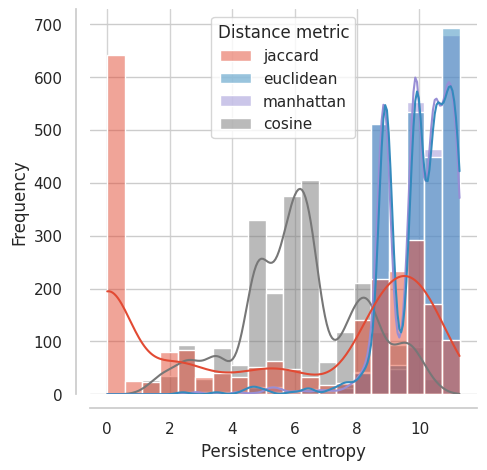

In [17]:
import seaborn as sns
from plotting import load_plot_config, get_default_palette
sns.set_theme(rc={'figure.figsize':(5, 5)})

load_plot_config()
fig = sns.histplot(df, x="ph_entr_0", hue="distance_metric", kde=True, stat="frequency", palette=get_default_palette(), bins=20, alpha=0.5)
fig.xaxis.grid(True)
fig.xaxis.grid(color='lightgray')
fig.set(ylabel="Frequency")
fig.set(xlabel="Persistence entropy")
fig.set_axisbelow(True)
legend = fig.get_legend()
legend.set_title('Distance metric')
sns.despine(offset=10)
fig.figure.savefig(f'plots/dist_metric.png', dpi=300, bbox_inches="tight")
fig

In [18]:
print("Shape before distance filter: ", df.shape)
df = df[((df["representation_type"].isin(["descriptor", "embedding"]) & (df["distance_metric"] == "euclidean"))) 
        | ((df["representation_type"].isin(["fingerprint"])  & (df["distance_metric"] == "jaccard")))]
print("Shape after distance filter: ", df.shape)

Shape before distance filter:  (21216, 162)
Shape after distance filter:  (5304, 162)


Check which models work best for which representation
- Embeddings generally use MLPs more often

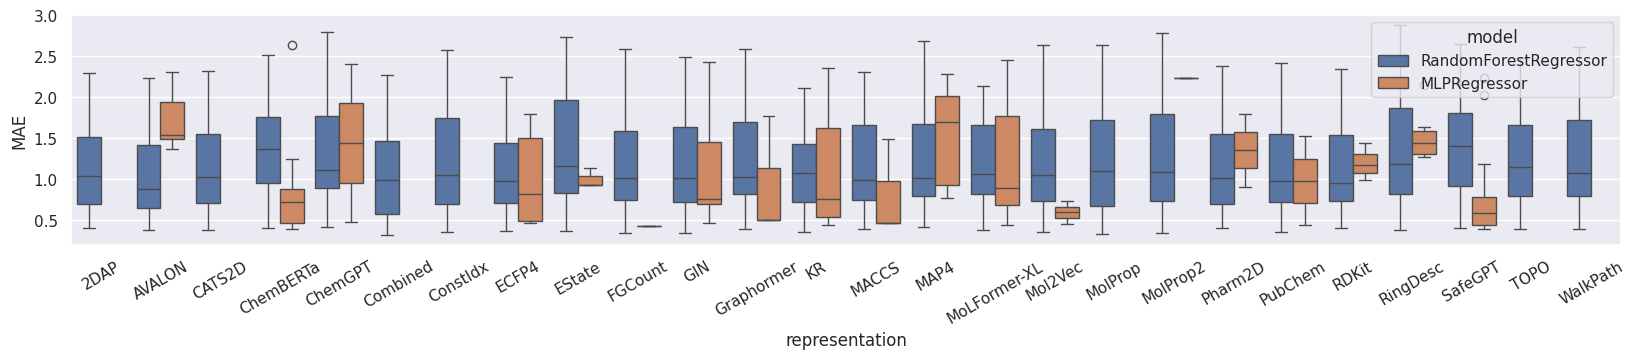

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

dimensions = ["representation", "dataset", "samples", "distance_metric", "split"]
metric = "MAE"
df_best = df.merge(df.groupby(dimensions)[[metric]].agg(best = (metric, "min")), how="left", on=dimensions)
best_data = df_best[df_best[metric] == df_best["best"]].groupby(dimensions + ["model"])["MAE"].first().reset_index()

sns.set_theme(rc={'figure.figsize':(20, 3)})
p = sns.boxplot(data=best_data, x="representation", y="MAE", hue="model")
plt.xticks(rotation=30)
plt.show()

Filter fine-tune model

In [20]:
# INTUITIVE = Embeddings use a dense fine-tune layer, Fingerprints use a RF
# BEST = Use the best model for each representation
option = "BEST"

if option == "INTUITIVE":
    df = df[(df["representation_type"] == "fingerprint") & (df["model"] == "RandomForestRegressor")
        | (df["representation_type"] == "descriptor") & (df["model"] == "RandomForestRegressor")
        | (df["representation_type"] == "embedding") & (df["model"] == "MLPRegressor")]
elif option == "BEST":
    dimensions = ["representation", "dataset", "samples", "distance_metric", "split"]
    metric = "MAE"
    df_best = df.merge(df.groupby(dimensions)[[metric]].agg(best = (metric, "min")), how="left", on=dimensions)
    best_data = df_best[df_best[metric] == df_best["best"]].groupby(dimensions + ["model"])["MAE"].first().reset_index()
    d = df.merge(best_data, on=dimensions + ["model"], how="left")
    df = d[d[f"{metric}_x"] == d[f"{metric}_y"]]
    df = df.drop("MAE_y", axis=1)
    df = df.rename({"MAE_x": "MAE"}, axis=1)

print("New shape: ", df.shape)

New shape:  (2652, 162)


/tmp/ipykernel_2571526/2601028836.py:3: UserWarning:

The palette list has more values (7) than needed (2), which may not be intended.



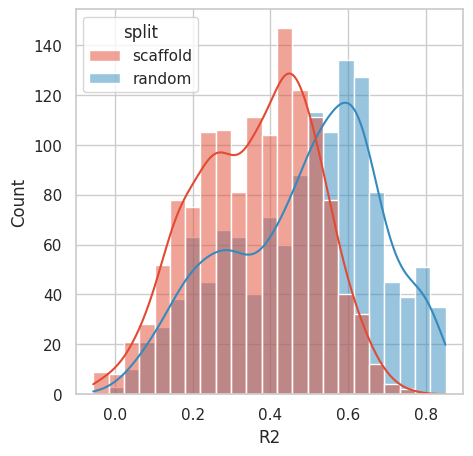

In [21]:
sns.set_theme(rc={'figure.figsize':(5, 5)})
load_plot_config()
fig = sns.histplot(df[df["R2"] > -1], x="R2", hue="split", kde=True, palette=get_default_palette())
fig.figure.savefig('plots/r2_dist.png', dpi=300)

Check which representations use which model types
- Random Forest is generally better suited for fine-tuning

In [22]:
import plotly.express as px

fig = px.bar(df.groupby(["model", "representation_type"]).agg(count=('MAE', 'count')).reset_index(), x="model", y="count", color="representation_type")
fig.show()

Compute normalized errors based on best models
- Normalization per dataset ensures that the errors are between 0 and 1
- Split is added to separate scaffold and random split trainings
- One could include the samplesize as well here, to normalize the error within each sample-dataset-split group. This leads to a ranking within each triple, which will not perform too well in the TopoLearn prediction, because multiple rankings occur multiple times e.g. the score 0.2 can occur in 500, 1000, ... ect. While effectively the one in 500 leads to the worst results.

In [23]:
agg_group = ["dataset", "split"] # sample_size

# Compute min and max for normalization
per_ds_min_mae = df.groupby(agg_group)["MAE"].min().rename("MAE_min")
per_ds_min_rmse = df.groupby(agg_group)["RMSE"].min().rename("RMSE_min")
per_ds_min_r2 = df.groupby(agg_group)["R2"].min().rename("R2_min")
per_ds_max_mae = df.groupby(agg_group)["MAE"].max().rename("MAE_max")
per_ds_max_rmse = df.groupby(agg_group)["RMSE"].max().rename("RMSE_max")
per_ds_max_r2 = df.groupby(agg_group)["R2"].max().rename("R2_max")
per_ds_max_cv = df.groupby(agg_group)["best_cv_score"].max().rename("best_cv_score_max")
per_ds_min_cv = df.groupby(agg_group)["best_cv_score"].min().rename("best_cv_score_min")

# Merge min and max to main df
df = df.merge(per_ds_min_mae, on=agg_group, how="left")
df = df.merge(per_ds_min_rmse, on=agg_group, how="left")
df = df.merge(per_ds_min_r2, on=agg_group, how="left")
df = df.merge(per_ds_max_mae, on=agg_group, how="left")
df = df.merge(per_ds_max_rmse, on=agg_group, how="left")
df = df.merge(per_ds_max_r2, on=agg_group, how="left")
df = df.merge(per_ds_max_cv, on=agg_group, how="left")
df = df.merge(per_ds_min_cv, on=agg_group, how="left")

# Compute relative errors in range [0, 1]
df["Relative MAE"] = (df["MAE"] - df["MAE_min"]) / (df["MAE_max"] - df["MAE_min"])
df["Relative RMSE"] = (df["RMSE"] - df["RMSE_min"]) / (df["RMSE_max"] - df["RMSE_min"])
df["Relative R2"] = (df["R2"] - df["R2_min"]) / (df["R2_max"] - df["R2_min"])
df["Relative CV score"] = (df["best_cv_score"] - df["best_cv_score_min"]) / (df["best_cv_score_max"] - df["best_cv_score_min"])

Extract hyperparameters as new columns

In [24]:
from ast import literal_eval
import numpy as np

h_param_cols = set(sum([list(literal_eval(d).keys()) for d in df["best_params"].unique()], []))

for col in h_param_cols:
    df[col] = np.nan

for i, row in df.iterrows():
    params = literal_eval(row["best_params"])
    for p in params.keys():
        if type(params[p]) and df[p].dtype != "object":
            df[p] = df[p].astype(object)
        df.at[i, p] = params[p]

Check nans

In [25]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# MolProp2 leads to some nans
nans = df.isna().sum()
nans[nans > 0]

ph_entr_1                        78
lifetimes_min_1                  78
norm_lifetimes_min_1             78
lifetimes_max_1                  78
norm_lifetimes_max_1             78
lifetimes_mean_1                 78
norm_lifetimes_mean_1            78
lifetimes_var_1                  78
norm_lifetimes_var_1             78
lifetimes_sum_1                  78
norm_lifetimes_sum_1             78
midlifes_min_1                   78
norm_midlifes_min_1              78
midlifes_max_1                   78
norm_midlifes_max_1              78
midlifes_mean_1                  78
norm_midlifes_mean_1             78
midlifes_var_1                   78
norm_midlifes_var_1              78
midlifes_sum_1                   78
norm_midlifes_sum_1              78
ph_dim_1                        690
ph_entr_1_train                  87
lifetimes_min_1_train            87
norm_lifetimes_min_1_train       87
lifetimes_max_1_train            87
norm_lifetimes_max_1_train       87
lifetimes_mean_1_train      

Refine column names

In [26]:
print("Final shape: ", df.shape)
df.to_csv(f"{DIR}/results.csv", index=False)

Final shape:  (2652, 184)
